<a href="https://colab.research.google.com/github/nars95/machine_learning/blob/main/mnist_classification_bin%C3%A1ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classficação Binárica:

usaremos a base de dados mnisit para realizar estes experimentos.

1) classe possitiva: 5

2) classe negativa: não ser 5

# Importando as principais biblioteca utilizadas neste trabalho.
Caso haja necessidade, faremos importações específicas.

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Inspecionando o minist

In [4]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X , y = mnist["data"], mnist['target']

In [7]:
print(X.shape, y.shape)

(70000, 784) (70000,)


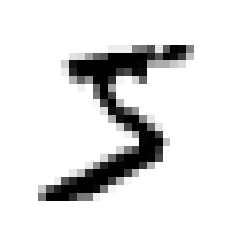

In [8]:
digit = X[0]
digit_five = digit.reshape(28,28)
plt.imshow(digit_five, cmap = 'binary')
plt.axis('off')
plt.show()

In [9]:
y[0]

'5'

convertendo os rôtulos unsigned int

In [10]:
y = y.astype(np.uint8)

# Separando os dados de treino e teste
o mnist já implementa isso. As primeiras 60000 instâncias para treino e as restantes para testes.

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


#Treiando um classifcador binário: SGDClassifier

In [13]:
y_train_5 =  (y_train == 5)
y_test = (y_test == 5)

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
sgd_classifier = SGDClassifier(random_state = 42)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
sgd_classifier.predict([digit])

array([ True])

Cálculo de desempenho do SGDClassifier

In [17]:
# implementadno a validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
stkfolds = StratifiedKFold(n_splits = 3)

In [18]:
for train_index, test_index in stkfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_classifier)
  X_train_fold = X_train[train_index]
  y_train_fold = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]
  clone_clf.fit(X_train_fold, y_train_fold)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct  = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))


0.95035
0.96035
0.9604


In [19]:
# é possível fazer o mesmo processo acima usando cross_val_score
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(sgd_classifier, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

Aprentemente, parece que o sistema está praticamente "perito" em identificar o número 5. Mas quando não é 5, o modelo também tem um bom desempenho ? vamos verificar

In [21]:
from sklearn.base import BaseEstimator

In [22]:
class Never5Classifier(BaseEstimator):
  def fit(self, X, y = None):
    pass
  def predict(self, X):
    return np.zeros((len(X),1), dtype = bool)

In [23]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')
'''
Aparentemente o sistema obteve boas métricas de acurácia. Ai que mora o problema: apenas 10% das amostras
representam um instância 5, ou seja, o modelo poderá está apenas está chutando e terá 90 % de chance de está
certo na maioria das vezes.
'''

'\nAparentemente o sistema obteve boas métricas de acurácia. Ai que mora o problema: apenas 10% das amostras\nrepresental um instância 5, ou seja, o modelo poderá está apenas chutando e terá 90 % de chance de está\ncerto na mioria das vezes.\n'

# Matriz de confusão e métricas

In [94]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [25]:
y_train_predict = cross_val_predict(sgd_classifier, X_train, y_train_5, cv  = 3)

In [26]:
confusion_matrix(y_train_5, y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

As linhas da matriz representam as os rôtulos verdadeiros: primeira linha classe negativa (não ser 5) e a segunda classe positiva(ser 5). As colunas
representam as predições o sgd_classifier: 1) predição de classe negativa e 2) predição  de classe positiva

In [27]:
# um classificador perfeito teira o seguinte comportamento
y_perfect = y_train_5
confusion_matrix(y_train_5, y_perfect)

array([[54579,     0],
       [    0,  5421]])

In [28]:
# precision score
precision_score(y_train_5, y_train_predict)

0.8370879772350012

In [29]:
#recall score ou também conhecida como sensibilidade ou taxe de verdadeiro positivo (TPR)
recall_score(y_train_5, y_train_predict)

0.6511713705958311

In [30]:
# f1_score:média harmônmica da precisão e revocação.
f1_score(y_train_5, y_train_predict)

0.7325171197343846

É importante ressaltar que dependendo do problema, será preciso fazer a escolha entre  recall e precission. Isso porque se a sensibilidade aumenta, a precision tende a dimunuir em geral.
Isso ocorre porque o classificador SGDClassifier usa uma função de decisão que depende de um limiar para classificar cada instância. Se o score for maior que esse threshold, a instância será classficada como positiva ou negativa.

In [31]:
y_scores = sgd_classifier.decision_function([digit])
y_scores

array([2164.22030239])

In [33]:
threshold  = 0
y_digit_pred = (y_scores > threshold)
y_digit_pred # número 5 classificado corretamente: recall bom

array([ True])

In [34]:
#aumentando o limia
threshold = 8000
y_digit_pred = (y_scores > threshold)
y_digit_pred  # número cinco classificado errado, recaal diminuiu pois aumentou o número de falso negativo

array([False])

In [36]:
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv = 3, method='decision_function')

In [38]:
from sklearn.metrics import precision_recall_curve

In [40]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [89]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.figure()
  plt.plot(thresholds, precisions[:-1], "--b", label  = "Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
  plt.xlabel("Threshold")
  plt.grid()
  plt.show()


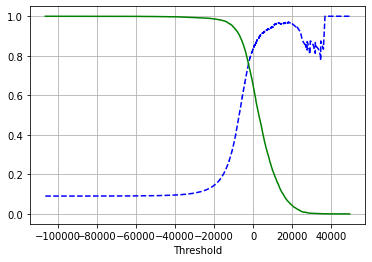

In [90]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

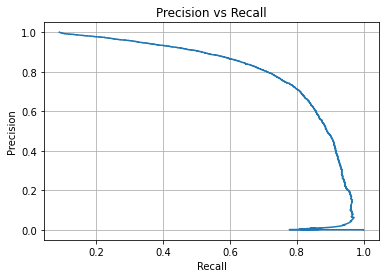

In [85]:
# outra forma de visualizar é analisar diretamente a precision em relação a recaal
plt.plot(precisions, recalls)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.title("Precision vs Recall")
plt.show()

In [87]:
# econtrando o melhor limiar para se ter uma  precision >= 90
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [92]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [96]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [97]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

Usando a curva ROC

In [101]:
from sklearn.metrics import roc_curve

In [102]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [106]:
def plot_roc_curve(fpr, tpr, label = None):
  plt.plot(fpr, tpr, linewidth = 2, label = label)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Posite Rate (Recall)")
  plt.grid()
  plt.show()

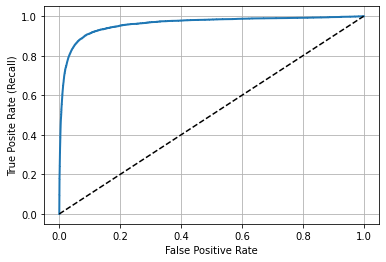

In [107]:
plot_roc_curve(fpr, tpr)

In [108]:
# calculando a área sob a curva é uma forma de avaliar o desempenho do classificador
from sklearn.metrics import roc_auc_score

In [109]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [110]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier  = RandomForestClassifier(random_state = 42)
proba_forest = cross_val_predict(forest_classifier, X_train, y_train_5, cv = 3, method = "predict_proba")

In [111]:
y_scores_forest = proba_forest[:,1] # probabilidade da classe positiva: 5
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

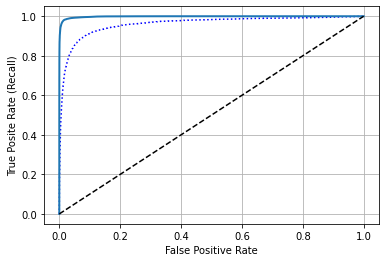

In [115]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random_forest")
plt.show();

In [121]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [116]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

Pelas análise da curva ROC e do cálculo da área sob a curva,
o RandomForest apresenta um melhor desempenho.